Features: 1, Cross-Validation Score: 0.0017
Features: 2, Cross-Validation Score: 0.0008
Features: 3, Cross-Validation Score: 0.0002
Features: 4, Cross-Validation Score: 0.0002
Features: 5, Cross-Validation Score: 0.0002
Features: 6, Cross-Validation Score: 0.0002
Features: 7, Cross-Validation Score: 0.0002
Features: 8, Cross-Validation Score: 0.0002
Features: 9, Cross-Validation Score: 0.0002
Features: 10, Cross-Validation Score: 0.0002
Features: 11, Cross-Validation Score: 0.0002
Features: 12, Cross-Validation Score: 0.0002
Features: 13, Cross-Validation Score: 0.0002
Features: 14, Cross-Validation Score: 0.0002
Features: 15, Cross-Validation Score: 0.0002
Features: 16, Cross-Validation Score: 0.0003
Features: 17, Cross-Validation Score: 0.0003
Features: 18, Cross-Validation Score: 0.0003
Features: 19, Cross-Validation Score: 0.0003
Features: 20, Cross-Validation Score: 0.0003


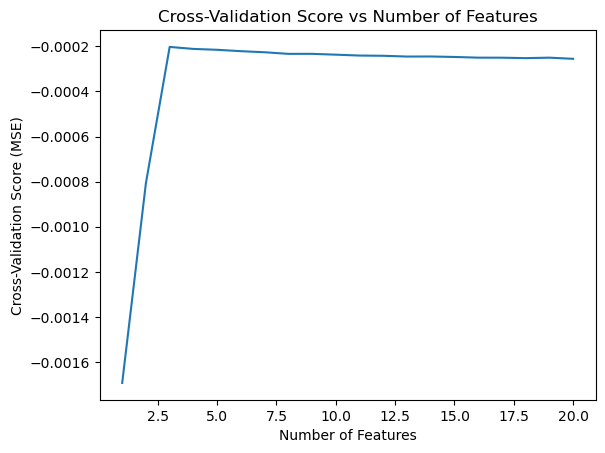

Best Number of Features: 1
Mean Squared Error with 1 features: 0.0048
Selected Key Temperature Features:  ['Temperature_2']


In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# 自拟数据：假设有20个温度传感器和3个位移传感器，每个传感器记录400个数据
np.random.seed(42)
n_samples = 400  # 每个传感器记录的数据点数
n_temp_sensors = 20  # 温度传感器数量
n_displacement_sensors = 3  # 位移传感器数量

# 模拟温度传感器数据（正态分布，均值为25，标准差为2）
temperature_data = np.random.normal(loc=25, scale=2, size=(n_samples, n_temp_sensors))

# 模拟位移传感器数据（假设位移与温度有一定关系，增加一些噪声）
displacement_data = temperature_data[:, :3] * 0.02 + np.random.normal(loc=0, scale=0.01, size=(n_samples, n_displacement_sensors))

# 将数据转换为 DataFrame 形式
temperature_df = pd.DataFrame(temperature_data, columns=[f'Temperature_{i+1}' for i in range(n_temp_sensors)])
displacement_df = pd.DataFrame(displacement_data, columns=[f'Displacement_{i+1}' for i in range(n_displacement_sensors)])

# 合并数据
X = temperature_df.values  # 温度传感器数据
y = displacement_df.values  # 位移传感器数据

# 1. 使用 RandomForestRegressor 进行特征选择
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. 使用 RFE 结合交叉验证来选择最佳特征数量
scores = []
for n in range(1, X.shape[1] + 1):  # 从1个特征到所有特征
    # 使用 RFE 选择前 n 个特征
    rfe_rf = RFE(estimator=rf, n_features_to_select=n, step=1)
    X_rfe = rfe_rf.fit_transform(X, y)
    
    # 使用交叉验证评估模型性能
    score = cross_val_score(rf, X_rfe, y, cv=5, scoring='neg_mean_squared_error').mean()  # 使用均方误差(MSE)评估
    scores.append(score)
    
    print(f"Features: {n}, Cross-Validation Score: {-score:.4f}")

# 画出不同特征数目下的交叉验证得分变化
plt.plot(range(1, X.shape[1] + 1), scores)
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score (MSE)')
plt.title('Cross-Validation Score vs Number of Features')
plt.show()

# 3. 找到最优的特征数量（即交叉验证得分最小的特征数量）
best_n_features = np.argmin(scores) + 1  # 得分最低的特征数对应最佳特征数量
print(f"Best Number of Features: {best_n_features}")

# 4. 使用 RFE 选择最佳特征数量的特征
rfe_rf = RFE(estimator=rf, n_features_to_select=best_n_features, step=1)
X_rfe = rfe_rf.fit_transform(X, y)

# 5. 使用 BP 神经网络训练
bp_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
bp_model.fit(X_rfe, y)

# 6. 评估模型的性能
y_pred = bp_model.predict(X_rfe)
mse = np.mean((y_pred - y) ** 2)
print(f"Mean Squared Error with {best_n_features} features: {mse:.4f}")

# 7. 打印最终选择的温度关键点
selected_features = [f'Temperature_{i+1}' for i in range(X.shape[1]) if rfe_rf.support_[i]]
print("Selected Key Temperature Features: ", selected_features)


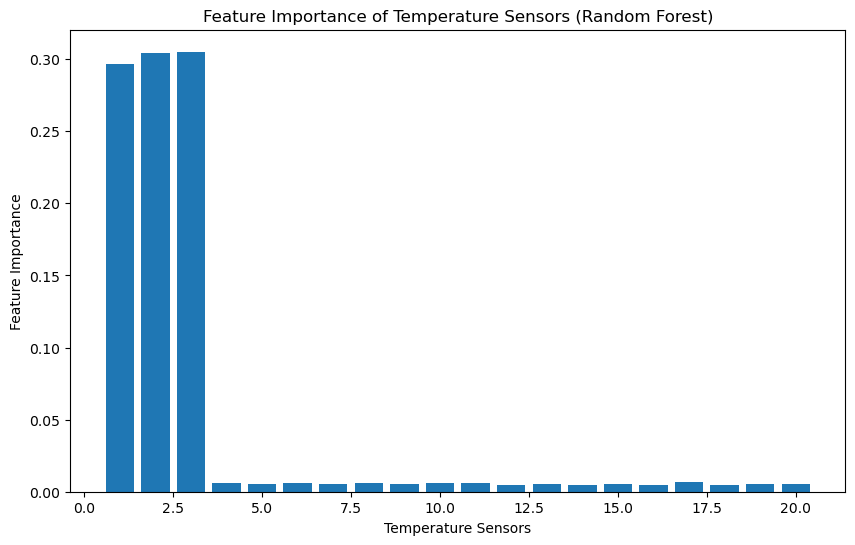

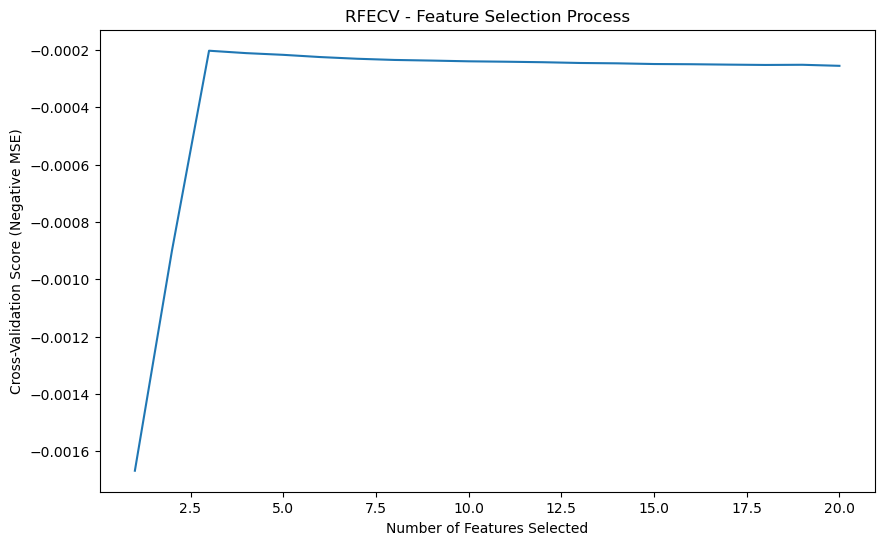

Best Number of Features Selected: 3
Mean Squared Error on Test Set: 0.0049
Selected Key Temperature Features:  ['Temperature_1', 'Temperature_2', 'Temperature_3']


In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Step 1: 自拟数据 - 20 个温度传感器，每个传感器记录 400 个数据点
np.random.seed(42)
n_samples = 400  # 每个传感器记录的数据点数
n_temp_sensors = 20  # 温度传感器数量

# 模拟温度传感器数据（正态分布，均值为 25，标准差为 2）
temperature_data = np.random.normal(loc=25, scale=2, size=(n_samples, n_temp_sensors))

# 假设位移与温度变化有关，增加噪声
displacement_data = temperature_data[:, :3] * 0.02 + np.random.normal(loc=0, scale=0.01, size=(n_samples, 3))

# 将数据转换为 DataFrame 形式
temperature_df = pd.DataFrame(temperature_data, columns=[f'Temperature_{i+1}' for i in range(n_temp_sensors)])
displacement_df = pd.DataFrame(displacement_data, columns=[f'Displacement_{i+1}' for i in range(3)])

# 合并数据
X = temperature_df.values  # 温度传感器数据
y = displacement_df.values  # 位移传感器数据

# Step 2: 使用随机森林确定特征重要性
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

# 可视化特征重要性
plt.figure(figsize=(10, 6))
plt.bar(range(1, n_temp_sensors + 1), feature_importances)
plt.xlabel('Temperature Sensors')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of Temperature Sensors (Random Forest)')
plt.show()

# Step 3: 递归特征消除与交叉验证选择最佳特征数量
rfecv = RFECV(estimator=rf, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X, y)

# 可视化特征选择过程
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score (Negative MSE)')
plt.title('RFECV - Feature Selection Process')
plt.show()

# 最优特征数量
best_n_features = rfecv.n_features_
print(f"Best Number of Features Selected: {best_n_features}")

# Step 4: 使用 BP 神经网络进行优化和训练
# 选择最优特征
X_rfe = rfecv.transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# 使用 BP 神经网络进行训练
bp_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
bp_model.fit(X_train, y_train)

# 评估模型
y_pred = bp_model.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

# Step 5: 输出最终选择的温度关键点
selected_features = [f'Temperature_{i+1}' for i in range(n_temp_sensors) if rfecv.support_[i]]
print("Selected Key Temperature Features: ", selected_features)
